## PRUEBA #2 (Numeros Aleatorios)

#### AUTOR: CARLOS MOROCHO

#### ENUNCIADO

Introducción:
Es fundamental verificar la calidad de los números  pseudoaleatorios. Ademas es importante no olvidar las 2 propiedades más importantes que deben tener los números pseudoaleatorios: uniformidad e independencia.

La uniformidad se puede verificar usando las pruebas de bondad de ajuste test Chi Cuadrada

Chi-Cuadrada

Esta prueba verifica la desviación del valor esperado y  se usa cuando se trabaja con variables nominales (categorías o grupos)
Debemos responder a la pregunta: ¿Difieren las frecuencias observadas de la frecuencia esperada?

Pasos para aplicar la prueba:

1. Tomar la serie de N números pseudo-aleatorios.

2. Dividir la serie en n intervalos (grados libertad)

3. Calcular la esperanza
E_i=N/n
4. Calcular la cantidad de números observados por intervalo

O_i
5. Calcular Chi – Cuadrado:
χ_0^2=(∑_(i=1)^k 〖(O_i-E_i)〗^2)/E_i 
6. Si     χ_0^2⩽χ_(k-1)^2          se acepta H0  (los números están distribuidos uniformemente)

Ejemplo de aplicación:

[Fuente]: http://www.mat.uda.cl/hsalinas/cursos/2010/eyp2/Tabla%20Chi-Cuadrado.pdf

Realice un programa que permita calcular el valor de Chi-Cuadrada y genere la gráfica de distribución de los 100 primeros números pseudo-aleatorios generados por los métodos de cuadrados medios y productos medios.

Emplee el siguiente nivel de significancia α=0.05

Las semillas para generar los números son las siguientes:

 Cuadrados medios: Xo=74731897457, D=7
 Congruencia lineal: a=74731897457, b=37747318974, Xo=7, M=19

#### DESAROLLO DEL PROBLEMA

In [3]:
#Importamos librerias
import matplotlib.pyplot as plt
from tabulate import tabulate
#from prettytable import PrettyTable
import pandas as pd

Indica cuantas posiciones hacia adelanta o atrás puedo correr en base a la mitad de un numero, esto para poder sacar una cantidad de números.

In [4]:
def medios(digs):
    if digs % 2 != 0:
        return int(digs / 2), int(digs / 2) + 1
    else:
        return int(digs / 2), int(digs / 2)

Calculara el cuadrado medio y me retorna una lista de números entre [0-1] en base a la a una semilla y la cantidad de números medios que deseo sacar.

In [5]:
def cuadrados_medios(iters, semilla, dig):
    lista = []
    posI, posF = medios(dig)
    num = int(semilla)
    for i in range(iters):
        num = num ** 2
        tam = len(str(num))
        centro = str(num)[int(tam / 2) - posI: int(tam / 2) + posF]
        rd = round(int(centro) / 10 ** dig, 2)
        lista.append(rd)
        num = int(centro)
    return lista

Calculara la congruencia lineal y me retorna una lista de números entre [0-1] en base a la a una semilla y la cantidad de números medios que deseo sacar.

In [6]:
def congruencia(semilla,iteraciones,a,c,m, dig):
    lista = []
    for i in range(1, iteraciones):
        xn = (a*semilla + c) % m
        semilla = xn
        lista.append(round(xn/((dig*2)+(dig/2)+1),2))
    return lista

Retorna un diccionario con la cantidad de veces que un número se encuentra en una lista, para esto se recorre la lista que se necesita como parámetro.

In [7]:
def cantidad_lista(lista):
    dic = {}
    p1 = 0
    for i in range(0, 10):
        name = str(float(i) / 10) + "-" + str(float(i + 1) / 10)
        dic[name] = len(list(filter(lambda x: p1 < x < p1 + 0.1, lista)))
        p1 += 0.1
    return dic

Grafica un diccionario en base a un diccionario, obtenido las claves y valores del mismo.

In [13]:
def plot_histrograma(dic):
    plt.figure(figsize=(15, 5))
    keys = dic.keys()
    values = dic.values()
    plt.bar(keys, values, color="green")
    plt.title("Histograma de los rangos")
    plt.show()

Realiza los distintos procesos del chi cuadrado en base a un diccionario que cuenta con el rango y el numero de repeticiones, los cálculos a realizar necesario como “(Oi – Ei)²/Ei”. Retorna un dataFrame para mejor trabajo, la suma total del chi cuadrado y la validacion de la diferencia entre la distribución de ji cuadrado.

In [9]:
def chi_cuadrado(dic, val_vali):
    ei = []
    oi = []
    to = []
    for i in list(dic.keys()):
        ei.append(i)
        oi.append(dic[i])
        to.append((len(dic) - dic[i]) ** 2 / len(dic))
    d = {'Ei': ei, 'Oi': oi, "(Oi – Ei)²/Ei": to}
    df = pd.DataFrame(data=d)
    total = df['(Oi – Ei)²/Ei'].sum()
    validacion = total < val_vali
    return df, total, validacion

#### CALCULO DEL CHI CUADRADO (CUADRADOS MEDIOS)

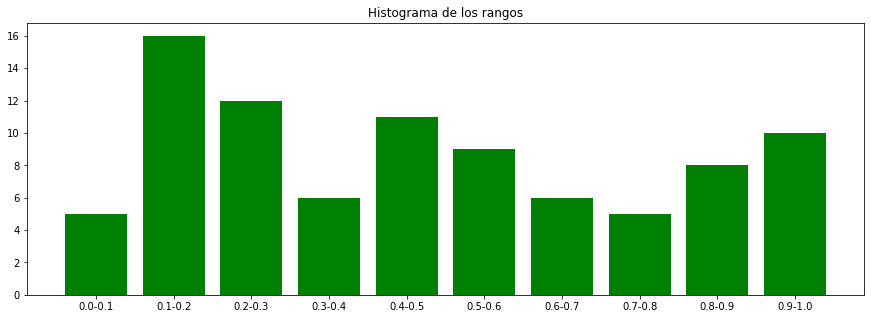

Total de (Oi – Ei)²/Ei 12.799999999999999
La distribución uniforme SE acepta
Valores del Chi Cuadrado


,Ei,Oi,(Oi – Ei)²/Ei
0,0.0-0.1,5,2.5
1,0.1-0.2,16,3.6
2,0.2-0.3,12,0.4
3,0.3-0.4,6,1.6
4,0.4-0.5,11,0.1
5,0.5-0.6,9,0.1
6,0.6-0.7,6,1.6
7,0.7-0.8,5,2.5
8,0.8-0.9,8,0.4
9,0.9-1.0,10,0.0


In [14]:
# Valor de semilla para cuadrados medios 
semilla = 74731897457
# Cantidad de numeros de cuadrados medios a obtener
cantidad = 100
# numero de dijitos medios a obtener en cuadrados medios
digs = 7
# Numero a validar de ji cuadrado 0.005 y 9 
val_ji = 16.9
# Obtencion de una lista de @cantidad de numeros aleatorios con cuadrados medios
lista = cuadrados_medios(cantidad, semilla, digs)
# Calculo de repeticion de los numeros en el rango [0.0 - 0.1, . . 0.9 - 1]
dic = cantidad_lista(lista)
# Graficamos la distribucion de los rangos
plot_histrograma(dic)
# Calculamos el chi cuandrado y obtemos el df con los calculos y el total de eso
df, total, val = chi_cuadrado(dic, val_ji)
print("Total de (Oi – Ei)²/Ei", total)
print(f"La distribución uniforme { 'SE' if val else 'NO SE'} acepta")
print("Valores del Chi Cuadrado")
df

#### CALCULO DEL CHI CUADRADO (CONCRUENCIA LINEAL)

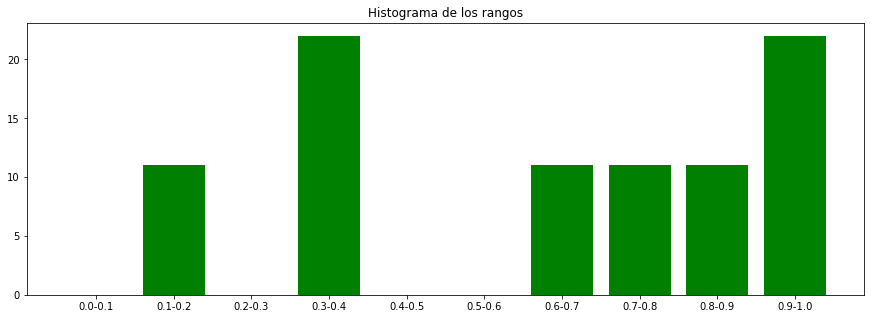

Total de (Oi – Ei)²/Ei 69.2 
 

La distribución uniforme NO SE acepta
Valores del Chi Cuadrado


,Ei,Oi,(Oi – Ei)²/Ei
0,0.0-0.1,0,10.0
1,0.1-0.2,11,0.1
2,0.2-0.3,0,10.0
3,0.3-0.4,22,14.4
4,0.4-0.5,0,10.0
5,0.5-0.6,0,10.0
6,0.6-0.7,11,0.1
7,0.7-0.8,11,0.1
8,0.8-0.9,11,0.1
9,0.9-1.0,22,14.4


In [15]:
#Valor de semilla para congruencia lieal
semilla = 74731897457
#Cantidad de numeros de congruencia lieal a obtener
cantidad = 100
#numero para calculo de rango entre 0 - 1
digs = 7
#numero a validar de ji cuadrado 0.005 y 9 
val_ji = 16.9
#Valores inicial de congruencia lieal
a=74731897457
c=37747318974
M=19 #mod == %

#Obtencion de una lista de @cantidad de numeros aleatorios con congruencia lieal
lista = congruencia(semilla, cantidad,a,c,M,digs)
dic = cantidad_lista(lista)
#Calculo de repeticion de los numeros en el rango [0.0 - 0.1, . . 0.9 - 1]
dic = cantidad_lista(lista)
#Graficamos la distribucion de los rangos
plot_histrograma(dic)
#Calculamos el chi cuandrado y obtemos el df con los calculos y el total de eso
df, total, val = chi_cuadrado(dic, val_ji)
print("Total de (Oi – Ei)²/Ei", total, "\n \n")
print(f"La distribución uniforme { 'SE' if val else 'NO SE'} acepta")
print("Valores del Chi Cuadrado")
df

## Referencias:
[1] : https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6291769/   
[2]: https://blog.inconcertcc.com/automatiza-el-marketing-digital-en-tus-redes-sociales/  
[3]: http://www.mat.uda.cl/hsalinas/cursos/2010/eyp2/Tabla%20Chi-Cuadrado.pdf
